## DRAFT: Proposed locations for all ICESat-2 Hackweek tutorials
This notebook provides parameters and visualizations for suggested locations and datasets for all ICESat-2 Hackweek tutorials. The tutorial will show how to access the data by downloading it to the system using `icepyx` or by access the pre-downloaded files hosted in the s3 bucket (so that the files do not need to be re-downloaded for each tutorial).

#### Credits
* notebook by: Jessica Scheick

### Locations
Locations and datasets were chosen based on Hackweek tutorial lead input and aim to encompass all of the primary components of the cryosphere (land ice, floating ice, fast flowing ice, first year and multiyear sea ice, midlatitude ice, snow, and snow/ice in steep terrain) while representing the diversity of ICESat-2 datasets. Available locations are:
* Byrd Glacier/Ross Ice Shelf
* Arctic Ocean (covering the north pole)
* Northwest Continental US (Washington state area)

They include datasets: ATL03, ATL0...

### Import packages, including icepyx

In [25]:
import os
import shutil
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
%cd ./../

/home/jovyan/icepyx
/home/jovyan/icepyx


In [12]:
%load_ext autoreload
from icepyx import is2class as ipd
%autoreload 2
#in order to use "as ipd", you have to use autoreload 2, which will automatically reload any module not excluded by being imported with %aimport -[module]

## Byrd Glacier/Ross Ice Shelf
* fast flowing ice, land ice, floating ice, blowing snow
* datasets: ATL03, ATL06, ATL09


In [16]:
short_name = 'ATL06'
spatial_extent = [148, -81, 162, -80]
date_range = ['2018-10-14','2018-12-22']

In [17]:
region_a = ipd.Icesat2Data(short_name, spatial_extent, date_range)

ATL06
['2018-10-14', '2018-12-22']
00:00:00
23:59:59
002
['bounding box', [148, -81, 162, -80]]


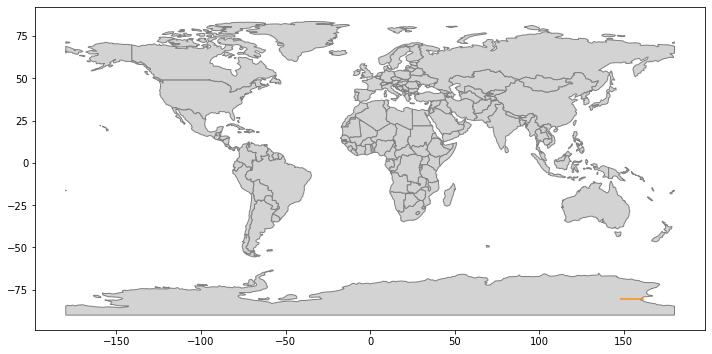

In [19]:
print(region_a.dataset)
print(region_a.dates)
print(region_a.start_time)
print(region_a.end_time)
print(region_a.dataset_version)
print(region_a.spatial_extent)
region_a.visualize_spatial_extent()

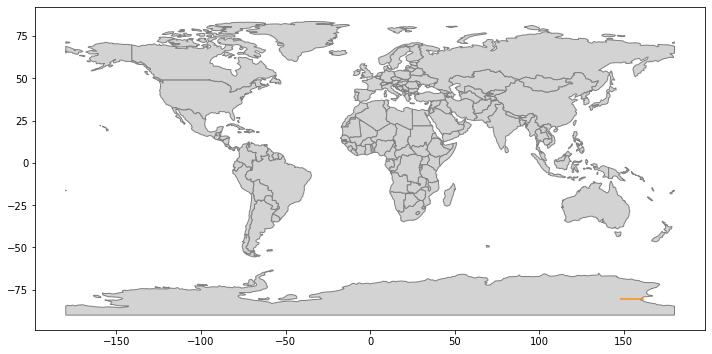

In [35]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
f, ax = plt.subplots(1, figsize=(12, 6))
world.plot(ax=ax, facecolor='lightgray', edgecolor='gray')
region_a.geodataframe().plot(ax=ax, color='#FF8C00',alpha = 0.7)
plt.show()

In [ ]:
region_a.avail_granules()

## Arctic Ocean
* sea ice (first and multiyear), leads
* datasets: ATL07, ATL09, ATL10, ATL12


In [36]:
short_name = 'ATL07'
spatial_extent = [0, 80, 180, 90]
date_range = ['2018-10-14','2018-12-22']

In [37]:
region_a = ipd.Icesat2Data(short_name, spatial_extent, date_range)

ATL07
['2018-10-14', '2018-12-22']
00:00:00
23:59:59
002
['bounding box', [0, 80, 180, 90]]


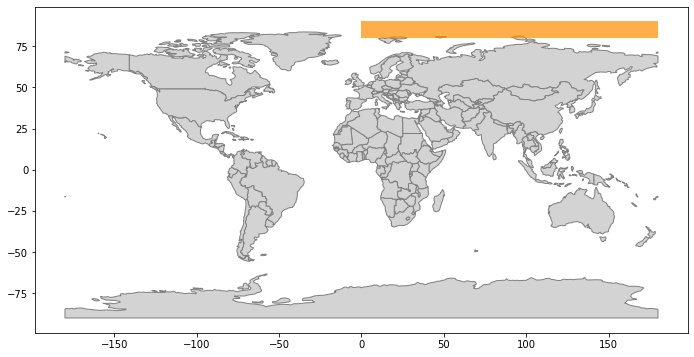

In [38]:
print(region_a.dataset)
print(region_a.dates)
print(region_a.start_time)
print(region_a.end_time)
print(region_a.dataset_version)
print(region_a.spatial_extent)
region_a.visualize_spatial_extent()

In [ ]:
region_a.avail_granules()

## Northwest Continental US
* snow, mid-latitude glaciers, steep topography
* datasets: ATL06, ATL08, ATL13


In [16]:
short_name = 'ATL06'
spatial_extent = ''
date_range = ['2018-10-14','2018-12-22']

In [17]:
region_a = ipd.Icesat2Data(short_name, spatial_extent, date_range)

ATL06
['2018-10-14', '2018-12-22']
00:00:00
23:59:59
002
['bounding box', [148, -81, 162, -80]]


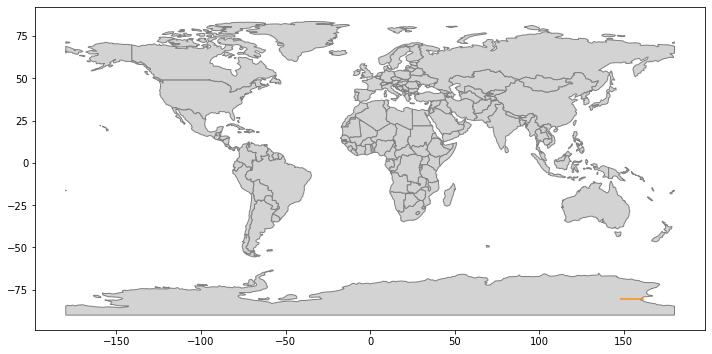

In [19]:
print(region_a.dataset)
print(region_a.dates)
print(region_a.start_time)
print(region_a.end_time)
print(region_a.dataset_version)
print(region_a.spatial_extent)
region_a.visualize_spatial_extent()

In [ ]:
region_a.avail_granules()

In [20]:
#print the information about the returned search results
region_a.granules

[{'producer_granule_id': 'ATL06_20190224014644_08800205_001_02.h5',
  'time_start': '2019-02-24T01:46:44.000Z',
  'orbit': {'ascending_crossing': '118.48823342351116',
   'start_lat': '80',
   'start_direction': 'D',
   'end_lat': '59.5',
   'end_direction': 'D'},
  'updated': '2019-07-29T15:24:14.848Z',
  'orbit_calculated_spatial_domains': [{'equator_crossing_date_time': '2019-02-24T01:20:38.079Z',
    'equator_crossing_longitude': '118.48823342351116',
    'orbit_number': '2468'}],
  'dataset_id': 'ATLAS/ICESat-2 L3A Land Ice Height V001',
  'data_center': 'NSIDC_ECS',
  'title': 'SC:ATL06.001:163362111',
  'coordinate_system': 'ORBIT',
  'time_end': '2019-02-24T01:52:09.000Z',
  'id': 'G1626612008-NSIDC_ECS',
  'original_format': 'ISO-SMAP',
  'granule_size': '51.3712024689',
  'browse_flag': True,
  'polygons': [['80.11254119920325 -55.514517904891214 61.18421494056679 -65.31024196939337 59.5979414453054 -65.65802135334556 59.620288355717484 -66.29682109861751 61.20767873724507 -6

### Downloading the found granules
In order to download any data from NSIDC, we must first authenticate ourselves using a valid Earthdata login. This will create a valid token to interface with the DAAC as well as start an active logged-in session to enable data download. The token is attached to the data object and stored, but the session must be passed to the download function. Passwords are entered but not shown or stored in plain text by the system (I think?)

In [22]:
earthdata_uid = ''
email = ''
session=region_a.earthdata_login(earthdata_uid, email)

Earthdata Login password:  ········


#### Download the order
Finally, we can download our order to a specified directory (which needs to have a full path but doesn't have to point to an existing directory) and the download status will be printed as the program runs. Additional information is again available by using the optional boolean keyword 'verbose'.

In [35]:
path = './downloads'
region_a.download_granules(session, path)

Order:  1
Request HTTP response:  201
Order request URL:  https://n5eil02u.ecs.nsidc.org/egi/request?short_name=ATL06&version=002&temporal=2019-02-22T00%3A00%3A00Z%2C2019-02-28T23%3A59%3A59Z&bounding_box=-64%2C66%2C-55%2C72&email=jessica.scheick%40maine.edu&token=464C6E30-135C-0274-5E50-8DA341E5D482&page_size=10&page_num=1&request_mode=async&agent=NO&include_meta=Y
Order request response XML content:  b'<?xml version="1.0" encoding="UTF-8" standalone="yes"?>\n<eesi:agentResponse xsi:schemaLocation="http://eosdis.nasa.gov/esi/rsp/e https://newsroom.gsfc.nasa.gov/esi/8.1/schemas/ESIAgentResponseExternal.xsd" xmlns="" xmlns:iesi="http://eosdis.nasa.gov/esi/rsp/i" xmlns:ssw="http://newsroom.gsfc.nasa.gov/esi/rsp/ssw" xmlns:eesi="http://eosdis.nasa.gov/esi/rsp/e" xmlns:esi="http://eosdis.nasa.gov/esi/rsp" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance">\n    <order>\n        <orderId>5000000415433</orderId>\n        <Instructions>You may receive an email about your order if you specif

#### Clean up the download folder by removing individual order folders:

In [31]:
#Clean up Outputs folder by removing individual granule folders 

for root, dirs, files in os.walk(path, topdown=False):
    for file in files:
        try:
            shutil.move(os.path.join(root, file), path)
        except OSError:
            pass
        
for root, dirs, files in os.walk(path):
    for name in dirs:
        os.rmdir(os.path.join(root, name))